In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('C://Users/user/Downloads/diabetes.csv')
diabetes_data = pd.DataFrame(diabetes_data)
print(diabetes_data['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [14]:
diabetes_data.info()
diabetes_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [24]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도 {0:0.4f}, 정밀도 {1:0.4f}, 재현율 {2:0.4f}, f1{3:0.4f}, AUC:{4:0.4f}'.format(accuracy, precision, recall,f1, roc_auc)) #{순서}

In [94]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for customthreshold in thresholds:
        binarizer = Binarizer(threshold = customthreshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값', customthreshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [29]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2)) #0.1 간격으로 그리겠다
    
    plt.xlabel('Treshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show


In [63]:
X = diabetes_data.drop('Outcome', axis =1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 156)

In [64]:
clf = LogisticRegression(max_iter = 500)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)[:,1]

In [65]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도 0.7987, 정밀도 0.7674, 재현율 0.6111, f10.6804, AUC:0.8070


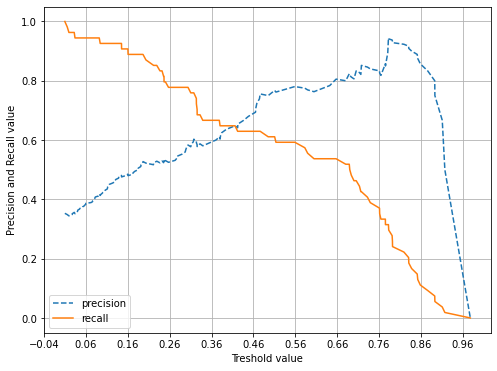

In [30]:
precision_recall_curve_plot(y_test, pred_proba)

In [31]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

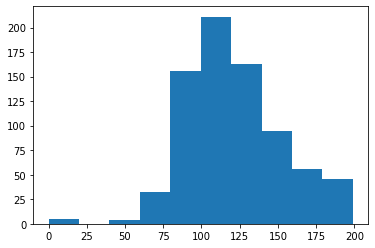

In [32]:
plt.hist(diabetes_data['Glucose'],bins= 10)

In [45]:
zero_columns = diabetes_data.columns
zero_columns = zero_columns.drop(['DiabetesPedigreeFunction','Age','Outcome','Pregnancies'])
zero_columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [46]:
diabete_zero = diabete_data[zero_columns]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [47]:
for feature in zero_columns:
    zero_count = diabete_zero[diabete_zero[feature]==0][feature].count()
    total_count = diabete_zero[feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [50]:
mean_zero_features = diabete_data[zero_columns].mean()
diabete_data[zero_columns]= diabete_data[zero_columns].replace(0, mean_zero_features)

In [1]:
y = diabete_data['Outcome']
X = diabete_data.drop('Outcome', axis = 1)

NameError: name 'diabete_data' is not defined

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)


오차행렬
[[90 10]
 [21 33]]
정확도 0.7987, 정밀도 0.7674, 재현율 0.6111, f10.6804, AUC:0.8070


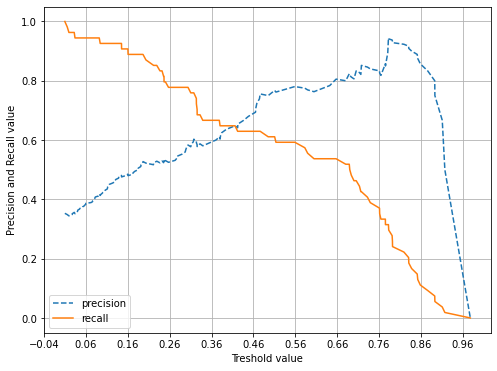

In [93]:
clf = LogisticRegression(max_iter = 500)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)
precision_recall_curve_plot(y_test, pred_proba)

In [100]:
threshold =[0.3 , 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]


In [96]:
pred_proba =clf.predict_proba(X_test)[:,1].reshape(-1,1)
pred_proba.shape

(154, 1)

In [101]:
get_eval_by_threshold(y_test, pred_proba, threshold)

임계값 0.3
오차행렬
[[69 31]
 [12 42]]
정확도 0.7208, 정밀도 0.5753, 재현율 0.7778, f10.6614, AUC:0.8070
임계값 0.33
오차행렬
[[74 26]
 [17 37]]
정확도 0.7208, 정밀도 0.5873, 재현율 0.6852, f10.6325, AUC:0.8070
임계값 0.36
오차행렬
[[76 24]
 [18 36]]
정확도 0.7273, 정밀도 0.6000, 재현율 0.6667, f10.6316, AUC:0.8070
임계값 0.39
오차행렬
[[80 20]
 [19 35]]
정확도 0.7468, 정밀도 0.6364, 재현율 0.6481, f10.6422, AUC:0.8070
임계값 0.42
오차행렬
[[81 19]
 [20 34]]
정확도 0.7468, 정밀도 0.6415, 재현율 0.6296, f10.6355, AUC:0.8070
임계값 0.45
오차행렬
[[85 15]
 [20 34]]
정확도 0.7727, 정밀도 0.6939, 재현율 0.6296, f10.6602, AUC:0.8070
임계값 0.48
오차행렬
[[89 11]
 [21 33]]
정확도 0.7922, 정밀도 0.7500, 재현율 0.6111, f10.6735, AUC:0.8070
임계값 0.5
오차행렬
[[90 10]
 [21 33]]
정확도 0.7987, 정밀도 0.7674, 재현율 0.6111, f10.6804, AUC:0.8070


In [108]:
binarizer = Binarizer(threshold = 0.48)
pred_th_048 = binarizer.fit_transform(pred_proba)
get_clf_eval(y_test, pred_th_048, pred_proba)

오차행렬
[[89 11]
 [21 33]]
정확도 0.7922, 정밀도 0.7500, 재현율 0.6111, f10.6735, AUC:0.8070


In [107]:
pred_proba

array([[0.00485622],
       [0.19134447],
       [0.12857646],
       [0.55884931],
       [0.03176141],
       [0.73914311],
       [0.8306848 ],
       [0.14490734],
       [0.17128774],
       [0.11136704],
       [0.69011951],
       [0.46797269],
       [0.04416568],
       [0.38428913],
       [0.24533697],
       [0.08945241],
       [0.77515589],
       [0.18463766],
       [0.0150614 ],
       [0.79128839],
       [0.42220315],
       [0.3254934 ],
       [0.05122239],
       [0.30023688],
       [0.27683538],
       [0.10455997],
       [0.91107194],
       [0.76116651],
       [0.18444863],
       [0.89343178],
       [0.19604485],
       [0.22143716],
       [0.11158126],
       [0.16040938],
       [0.10580882],
       [0.70546753],
       [0.22098882],
       [0.42268557],
       [0.83791083],
       [0.68048806],
       [0.44798549],
       [0.2463105 ],
       [0.69374805],
       [0.13124169],
       [0.35458159],
       [0.01904253],
       [0.70011342],
       [0.082